# Simple statistical process control and validation

## Objective of this document

In almost all manufacturing areas, Statistical Control Process (SPC) is an important part to monitor the trend of manufacturing process. In this document, a concise way to generate SPC key parameters and related plots will be presented. If you need an easy way to generate simple SPC related information, I hope this document could benefit you. 

## SPC key parameter explanation

<img src='SPC%20spec%20limit%20graph.jpg' width=60% />

* **Statistical Process Control (SPC)**: 
SPC is a widely used measure to help monitor and control production processes.
* **Spec limit**:
A set limit to ensure performance meeting the requirement, which is designed during development.
* **Control limit**:
Control limits are calculated from process data, to show the data variation during production run.
* **Standard deviation**:
Standard deviation reflects the variation of a group of data values. In a lot of scenarios, it's also known as Sigma (or σ).
* **Cpk or process capability Index**:
Cpk indicates how well the process is controlled and how close the data under monitored are distributed to the center of the process. In many mnaufacturing processes, a Cpk < 1.33 means process is poorly controlled, and Cpk > 1.33 means process is well capable.

### SPC distribution could also be illustrated as below:

#### Cases with both upper and lower limits considered:
<img src='SPC%20histo%20usl%20lsl.jpg' width=50% />

#### Cases with only one-side limit considered:
<img src='SPC%20histo%20usl.jpg' width=50% />


### How to process and illustrate SPC:

To calculate SPC parameters and plot the related control chart, some methods are listed below, but not limited to them:
   * Levey Jennings method
   * Individual control and moving range charts
   * Percentile method

Details on relative calculations and plots would not be discussed here, while **Levey Jennings method** is to be simply used in this notebook.

## What this document will do?

1. We will use some data to calculate the standard deviation and Cpk and related statistics. 
2. We will plot distribution histogram and the process data as a function of time with spec and control limits for a clear visualization.
3. With control and spec limits plotted together, we could visually understand how well the process is controlled and validate if the spec limits are properly defined.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data used in this notebook

In this notebook, we are using the related data as shared on https://www.sixsigmablackbelt.de/process-capability/, under excel file: process_capability_template_multilingual_20210429.xlsm. Herunterladen

In [2]:
df = pd.read_excel('Test_data.xlsx', header=None) # Load the xlsx file
Data_set = "Data" # give it a name for plot legend or plot title
unit = 'unit' # unit of the data if needed
df.columns = ["SN", Data_set]

In [3]:
df.shape

(104, 2)

In [4]:
# The current specs, need optimization to get appropriate nominal, USL and LSL
nominal = 19.00
USL = 22.00
LSL = 15.00

In [5]:
def get_stat(df, N_sigma = 3, USL = 22.00, LSL = 15.00, name = ''):
# Generate basic data information
    sample_size = len(df)
    mean_df = np.mean(df[Data_set])
    median_df = np.median(df[Data_set])
    std_df = np.std(df[Data_set])
    sigma_df = std_df
    max_df = np.max(df[Data_set])
    min_df = np.min(df[Data_set])
    range_df = np.subtract(max_df, min_df)
    UCL = mean_df + N_sigma * std_df
    LCL = mean_df - N_sigma * std_df
    
    stat = [sample_size, mean_df, median_df, std_df, sigma_df, max_df, min_df, range_df, UCL, LCL]
    stat_df = pd.DataFrame(stat)
    stat_df = stat_df.T
    stat_df.columns = ['sample size', 'mean', 'median', 'std',  'sigma', 
                       'max', 'min', 'range', 'UCL', 'LCL']
    
    Cp = (USL-LSL)/(6*sigma_df)
    CpU= (USL-mean_df)/(3*sigma_df)
    CpL= (mean_df-LSL)/(3*sigma_df)
    Cpk= min(CpU, CpL)
    cpk_df = [Cp, CpU, CpL, Cpk]
    cpk_df = pd.DataFrame(cpk_df)
    cpk_df = cpk_df.T
    cpk_df.columns = ['Cp', 'CpU', 'CpL', 'Cpk']
    
    result = pd.concat([stat_df, cpk_df], axis=1)
    
    return result

In [6]:
### To process and generate all std, sigma, range, control limits and cpk data
stat = get_stat(df, N_sigma = 3)
stat

,sample size,mean,median,std,sigma,max,min,range,UCL,LCL,Cp,CpU,CpL,Cpk
0,104.0,18.871154,18.9,1.173397,1.173397,21.5,16.1,5.4,22.391344,15.350963,0.994264,0.888829,1.0997,0.888829


In [7]:
def plot_hist(df, N_sigma = 3, USL = 22.00, LSL = 15.00, name = ''):
    sample_size = len(df)
    mean_df = np.mean(df[Data_set])
    median_df = np.median(df[Data_set])
    std_df = np.std(df[Data_set])
    sigma_df = std_df
    max_df = np.max(df[Data_set])
    min_df = np.min(df[Data_set])
    range_df = np.subtract(max_df, min_df)
    UCL = mean_df + N_sigma * std_df
    LCL = mean_df - N_sigma * std_df

    Cp = (USL-LSL)/(6*sigma_df)
    CpU= (USL-mean_df)/(3*sigma_df)
    CpL= (mean_df-LSL)/(3*sigma_df)
    Cpk= min(CpU, CpL)
    

    ## Plot histogram
    plt.hist(df[Data_set], bins=10, rwidth=0.7, range=[min_df, max_df])
    plt.gca().set(title=Data_set, xlabel = Data_set + ' (' + unit + ')', ylabel='Counts')

    plt.vlines(x=USL, ymin=0, ymax= max_df + 2 * std_df, color='red');
    plt.vlines(x=LSL, ymin=0, ymax= max_df + 2 * std_df, color='red');
    plt.text(USL, max_df + 2 * std_df, 'USL='+str(np.round(USL, 2)), color = 'red')
    plt.text(LSL, max_df + 2 * std_df, 'LSL='+str(np.round(LSL, 2)), color = 'red')

    plt.vlines(x=UCL,ymin=0,ymax= max_df + 1 * std_df, color='blue', linestyle ='dashed');
    plt.vlines(x=LCL,ymin=0,ymax= max_df + 1 * std_df, color='blue', linestyle ='dashed');
    plt.text(UCL, max_df + 1 * std_df, 'UCL='+str(np.round(UCL, 2)), color = 'blue')
    plt.text(LCL, max_df + 1 * std_df, 'LCL='+str(np.round(LCL, 2)), color = 'blue')

    plt.vlines(x=mean_df,ymin=0,ymax= max_df + 3 * std_df,color='green', linestyle ='dashed');
    plt.text(mean_df, max_df + 2 * std_df, 'Mean='+(str(np.round(mean_df, 2))), color = 'green')

    plt.text(mean_df, max_df + 3 * std_df,'CpK='+ str(np.round(Cpk,2)))

    #plt.savefig('Histogram.jpg', dpi=300) ## Enable or disable to export images

    plt.show()

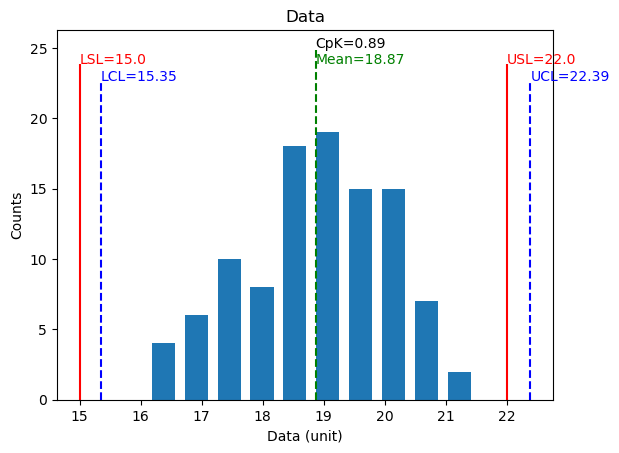

In [8]:
plot_hist(df)

In [9]:
def plot_trend(df, N_sigma = 3, USL = 22.00, LSL = 15.00, name = ''):
    sample_size = len(df)
    mean_df = np.mean(df[Data_set])
    median_df = np.median(df[Data_set])
    std_df = np.std(df[Data_set])
    sigma_df = std_df
    max_df = np.max(df[Data_set])
    min_df = np.min(df[Data_set])
    range_df = np.subtract(max_df, min_df)
    UCL = mean_df + N_sigma * std_df
    LCL = mean_df - N_sigma * std_df

    Cp = (USL-LSL)/(6*sigma_df)
    CpU= (USL-mean_df)/(3*sigma_df)
    CpL= (mean_df-LSL)/(3*sigma_df)
    Cpk= min(CpU, CpL)
    
    ## plot trend
    plt.plot(df[Data_set], linestyle=' ', marker='o')
    plt.gca().set(title=Data_set, xlabel = 'Number', ylabel= Data_set + ' (' + unit + ')')

    plt.hlines(y=USL, xmin=0, xmax= sample_size + 2 * std_df, color='red');
    plt.hlines(y=LSL, xmin=0, xmax= sample_size + 2 * std_df, color='red');
    plt.text(sample_size + 2 * std_df, USL, 'USL='+str(np.round(USL, 2)), color = 'red')
    plt.text(sample_size + 2 * std_df, LSL, 'LSL='+str(np.round(LSL, 2)), color = 'red')

    plt.hlines(y=UCL,xmin=0,xmax= sample_size + 1 * std_df, color='blue', linestyle ='dashed');
    plt.hlines(y=LCL,xmin=0,xmax= sample_size + 1 * std_df, color='blue', linestyle ='dashed');
    plt.text(sample_size + 1 * std_df, UCL, 'UCL='+str(np.round(UCL, 2)), color = 'blue')
    plt.text(sample_size + 1 * std_df, LCL, 'LCL='+str(np.round(LCL, 2)), color = 'blue')

    plt.hlines(y=mean_df,xmin=0,xmax= sample_size + 3 * std_df,color='green', linestyle ='dashed');
    plt.text(sample_size + 2 * std_df, mean_df, 'Mean='+str(np.round(mean_df, 2)), color = 'green')

    plt.text(sample_size + 2 * std_df, mean_df - 1 * std_df, 'CpK='+ str(np.round(Cpk,5)))

    #plt.savefig('Individual.jpg', dpi=300) ## Enable or disable to export images

    plt.show()


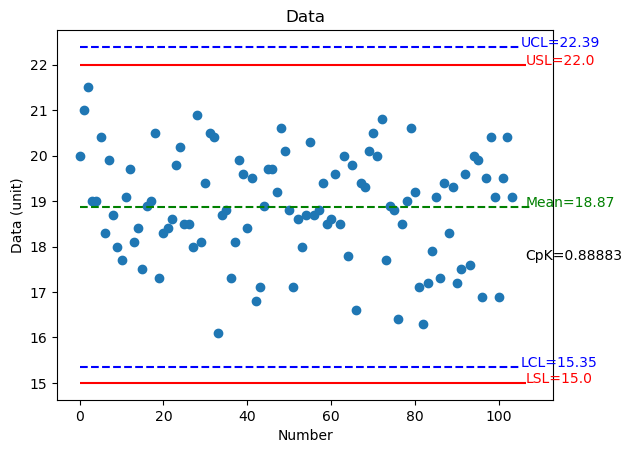

In [10]:
plot_trend(df)

#### Additional plots:

For some cases, we would compare two different sets of data, and it would easier to illustrate them when we put two data sets in one graph.

In [11]:
# Data frame to process by using df's first 50 sets and rest data after SN50 
## (rest data would be reserialized by staring from SN1)
df_f10 = df[:50]
df_rest = df[50:]

In [12]:
# Reset index to plot df_rest start from 0
df_rest = df_rest.reset_index()

In [13]:
def plot_trend_two_sets(df1, df2, N_sigma = 3, USL1 = 22.00, LSL1 = 15.00, USL2 = 22.00, LSL2 = 15.00, name1 = '', name2 = ''):
    sample_size1 = len(df1)
    mean_df1 = np.mean(df1[Data_set])
    median_df1 = np.median(df1[Data_set])
    std_df1 = np.std(df1[Data_set])
    sigma_df1 = std_df1
    max_df1 = np.max(df1[Data_set])
    min_df1 = np.min(df1[Data_set])
    range_df1 = np.subtract(max_df1, min_df1)
    UCL1 = mean_df1 + N_sigma * std_df1
    LCL1 = mean_df1 - N_sigma * std_df1

    Cp1 = (USL1-LSL1)/(6*sigma_df1)
    CpU1 = (USL1-mean_df1)/(3*sigma_df1)
    CpL1 = (mean_df1-LSL1)/(3*sigma_df1)
    Cpk1 = min(CpU1, CpL1)
    
    sample_size2 = len(df2)
    mean_df2 = np.mean(df2[Data_set])
    median_df2 = np.median(df2[Data_set])
    std_df2 = np.std(df2[Data_set])
    sigma_df2 = std_df2
    max_df2 = np.max(df2[Data_set])
    min_df2 = np.min(df2[Data_set])
    range_df2 = np.subtract(max_df2, min_df2)
    UCL2 = mean_df2 + N_sigma * std_df2
    LCL2 = mean_df2 - N_sigma * std_df2

    Cp2 = (USL2-LSL2)/(6*sigma_df2)
    CpU2 = (USL2-mean_df2)/(3*sigma_df2)
    CpL2 = (mean_df2-LSL2)/(3*sigma_df2)
    Cpk2 = min(CpU2, CpL2)
    
    ## plot trend1
    plt.plot(df1[Data_set], linestyle=' ', label = 'Data1', marker='o')
    plt.gca().set(title=Data_set, xlabel = 'Number', ylabel= Data_set + ' (' + unit + ')')

    plt.hlines(y=USL1, xmin=0, xmax= sample_size1 + 2 * std_df1, color='red');
    plt.hlines(y=LSL1, xmin=0, xmax= sample_size1 + 2 * std_df1, color='red');
    plt.text(sample_size1 + 2 * std_df1, USL1, 'USL1='+str(np.round(USL1, 2)), color = 'red')
    plt.text(sample_size1 + 2 * std_df1, LSL1, 'LSL1='+str(np.round(LSL1, 2)), color = 'red')

    plt.hlines(y=UCL1,xmin=0,xmax= sample_size1 + 1 * std_df1, color='blue', linestyle ='dashed');
    plt.hlines(y=LCL1,xmin=0,xmax= sample_size1 + 1 * std_df1, color='blue', linestyle ='dashed');
    plt.text(sample_size1 + 1 * std_df1, UCL1, 'UCL1='+str(np.round(UCL1, 2)), color = 'blue')
    plt.text(sample_size1 + 1 * std_df1, LCL1, 'LCL1='+str(np.round(LCL1, 2)), color = 'blue')

    plt.hlines(y=mean_df1,xmin=0,xmax= sample_size1 + 3 * std_df1,color='green', linestyle ='dashed');
    plt.text(sample_size1 + 2 * std_df1, mean_df1, 'Mean1='+str(np.round(mean_df1, 2)), color = 'green')

    plt.text(sample_size1 + 2 * std_df1, mean_df1 - 1 * std_df1, 'CpK1='+ str(np.round(Cpk1,5)))

    ## plot trend2
    plt.plot(df2[Data_set], linestyle=' ', label = 'Data2', marker='x')
    plt.gca().set(title=Data_set, xlabel = 'Number', ylabel= Data_set + ' (' + unit + ')')

    #plt.hlines(y=USL2, xmin=0, xmax= sample_size2 + 2 * std_df2, color='red');
    #plt.hlines(y=LSL2, xmin=0, xmax= sample_size2 + 2 * std_df2, color='red');
    #plt.text(sample_size2 + 2 * std_df2, USL2, 'USL='+str(np.round(USL2, 2)), color = 'red')
    #plt.text(sample_size2 + 2 * std_df2, LSL2, 'LSL='+str(np.round(LSL2, 2)), color = 'red')

    plt.hlines(y=UCL2,xmin=0,xmax= sample_size2 + 1 * std_df2, color='blue', linestyle ='dashed');
    plt.hlines(y=LCL2,xmin=0,xmax= sample_size2 + 1 * std_df2, color='blue', linestyle ='dashed');
    plt.text(sample_size2 + 1 * std_df2, UCL2, 'UCL2='+str(np.round(UCL2, 2)), color = 'blue')
    plt.text(sample_size2 + 1 * std_df2, LCL2, 'LCL2='+str(np.round(LCL2, 2)), color = 'blue')

    plt.hlines(y=mean_df2,xmin=0,xmax= sample_size2 + 3 * std_df2,color='green', linestyle ='dashed');
    plt.text(sample_size2 + 2 * std_df2, mean_df2, 'Mean2='+str(np.round(mean_df2, 2)), color = 'green')

    plt.text(sample_size2 + 2 * std_df2, mean_df2 - 1 * std_df2, 'CpK2='+ str(np.round(Cpk2,5)))
    
    #plt.savefig('Individual.jpg', dpi=300) ## Enable or disable to export images
    plt.legend(bbox_to_anchor=(-0.15, 1.15), loc='upper left')
    plt.show()


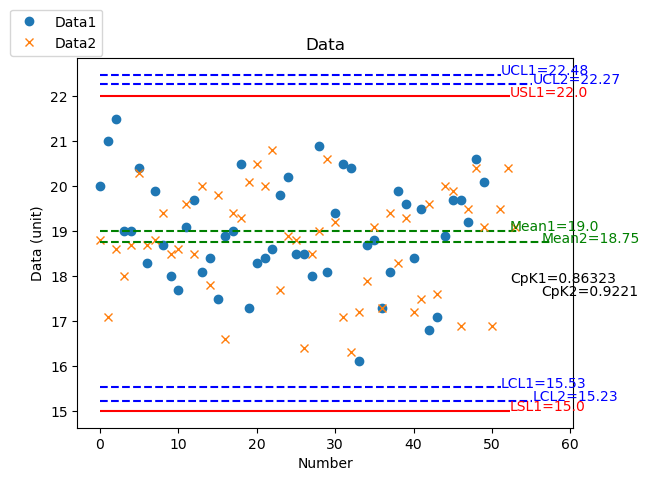

In [14]:
plot_trend_two_sets(df_f10, df_rest)